## Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

c:\Users\patri\anaconda3\envs\pytorch\scikit-learn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the Dataset

In [2]:
#%% Load the  original data
# Load the dataset
file_path = r'C:\Users\patri\git\SPIE-Thz\data\dataset6.csv'
df = pd.read_csv(file_path)
#df_select =  df[df['label 3'] == 4]

# Splitting the dataset into features and labels
features = df.iloc[:, 6:]
labels = df.iloc[:, :6]
labels_rest=labels.reset_index(drop=True,)


## Time setting for x-axis


In [3]:
start_time = 1790  # in ps
time_step = 0.05  # in ps
time_axis = np.arange(start_time, start_time + time_step * features.shape[1], time_step)

## Plotting the spectra

In [4]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

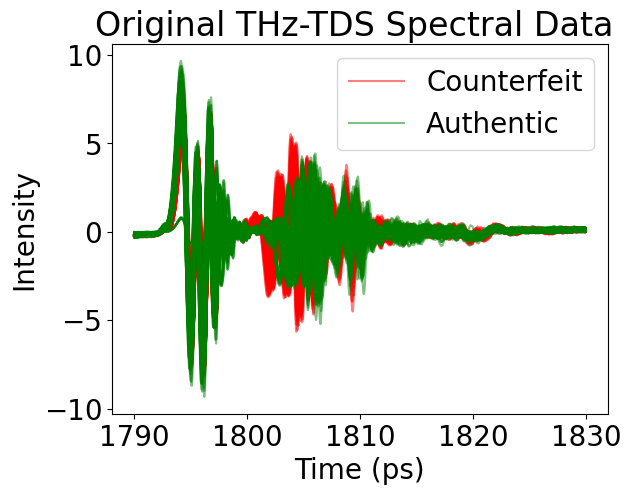

In [5]:
# Plotting spectra by category (Authentic and Counterfeit)
for index, row in df.iterrows():
    if row['AC'] == 'Authentic':
        color = 'green'
        label = 'Authentic'
    elif row['AC'] == 'Counterfeit':
        color = 'red'
        label = 'Counterfeit'
    else:
        continue  # Skip rows that are neither Authentic nor Counterfeit
    plt.plot(time_axis, row[6:], color=color, alpha=0.5, label=label)
plt.title('Original THz-TDS Spectral Data ')
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')

# Adding a legend and ensuring each label is only added once
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

## Normalization

In [6]:
## Normalizing the features row-wise
# We transpose the features to treat each row as a 'feature' for the purpose of row-wise normalization
scaler_row = StandardScaler()
features_scaled_row_wise = scaler_row.fit_transform(features.T).T

# Converting back to DataFrame for better visualization
features_scaled_row_wise_df = pd.DataFrame(features_scaled_row_wise, columns=features.columns)

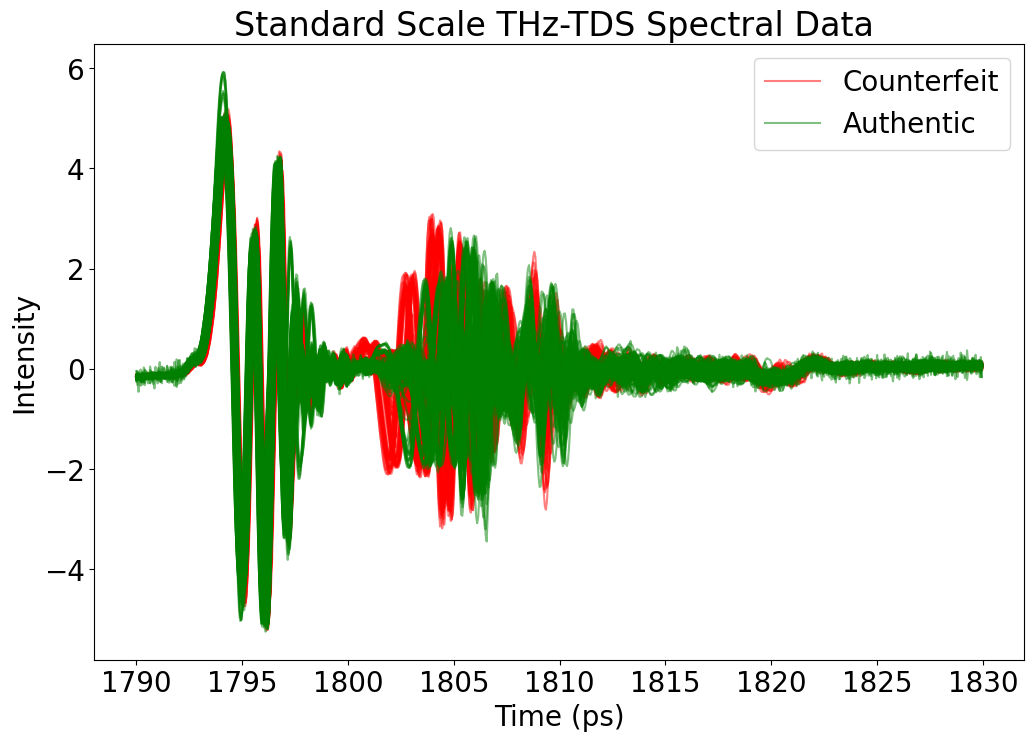

In [7]:
combined_scaled_df = pd.concat([labels_rest, features_scaled_row_wise_df], axis=1)

plt.figure(figsize=(12, 8))

# Plotting spectra by category (Authentic and Counterfeit)
for index, row in combined_scaled_df.iterrows():
    if row['AC'] == 'Authentic':
        color = 'green'
        label = 'Authentic'
    elif row['AC'] == 'Counterfeit':
        color = 'red'
        label = 'Counterfeit'
    else:
        continue  # Skip rows that are neither Authentic nor Counterfeit
    plt.plot(time_axis, row[6:], color=color, alpha=0.5, label=label)

plt.title('Standard Scale THz-TDS Spectral Data ')
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')
# Adding a legend and ensuring each label is only added once
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

## L1 Normalization

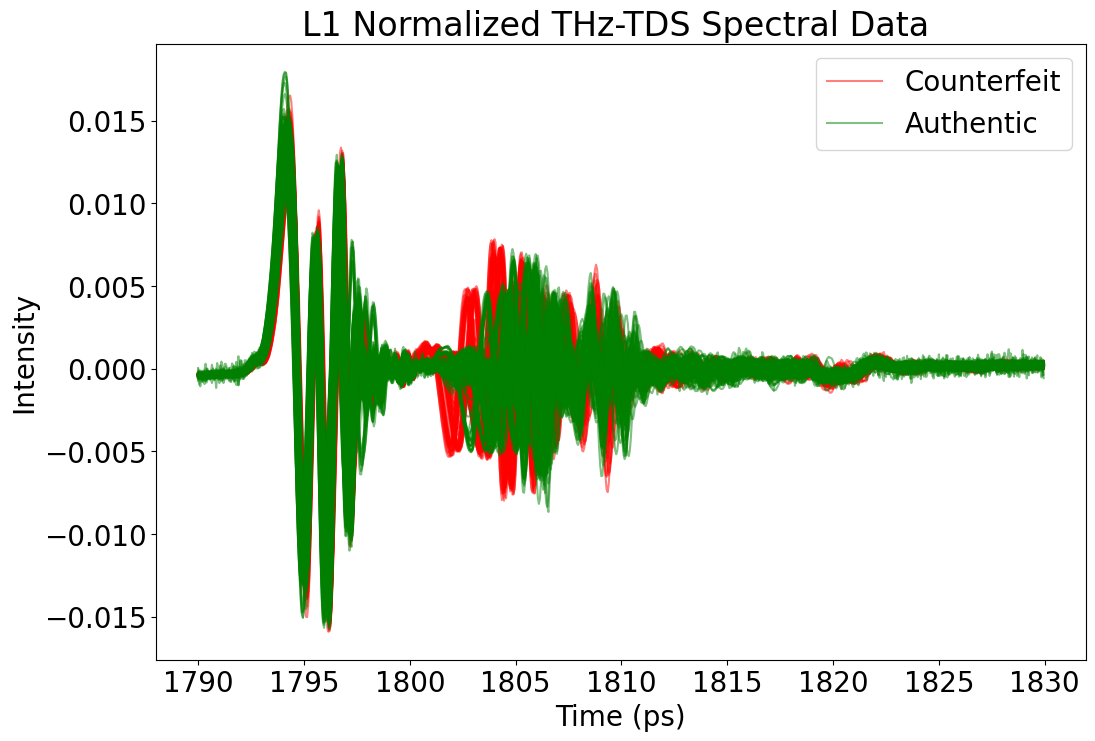

In [8]:

# Applying L1 normalization to the feature columns for each row
normalized_data = normalize(features, norm='l1', axis=1)

# Updating the dataset with the normalized data
#data.update(pd.DataFrame(normalized_data, columns=feature_data.columns))
features_l1_df = pd.DataFrame(normalized_data, columns=features.columns)

combined_l1_df = pd.concat([labels_rest, features_l1_df], axis=1)

plt.figure(figsize=(12, 8))

# Plotting spectra by category (Authentic and Counterfeit)
for index, row in combined_l1_df.iterrows():
    if row['AC'] == 'Authentic':
        color = 'green'
        label = 'Authentic'
    elif row['AC'] == 'Counterfeit':
        color = 'red'
        label = 'Counterfeit'
    else:
        continue  # Skip rows that are neither Authentic nor Counterfeit
    plt.plot(time_axis, row[6:], color=color, alpha=0.5, label=label)

plt.title('L1 Normalized THz-TDS Spectral Data ')
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')
# Adding a legend and ensuring each label is only added once
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

## Standardization and Normalization

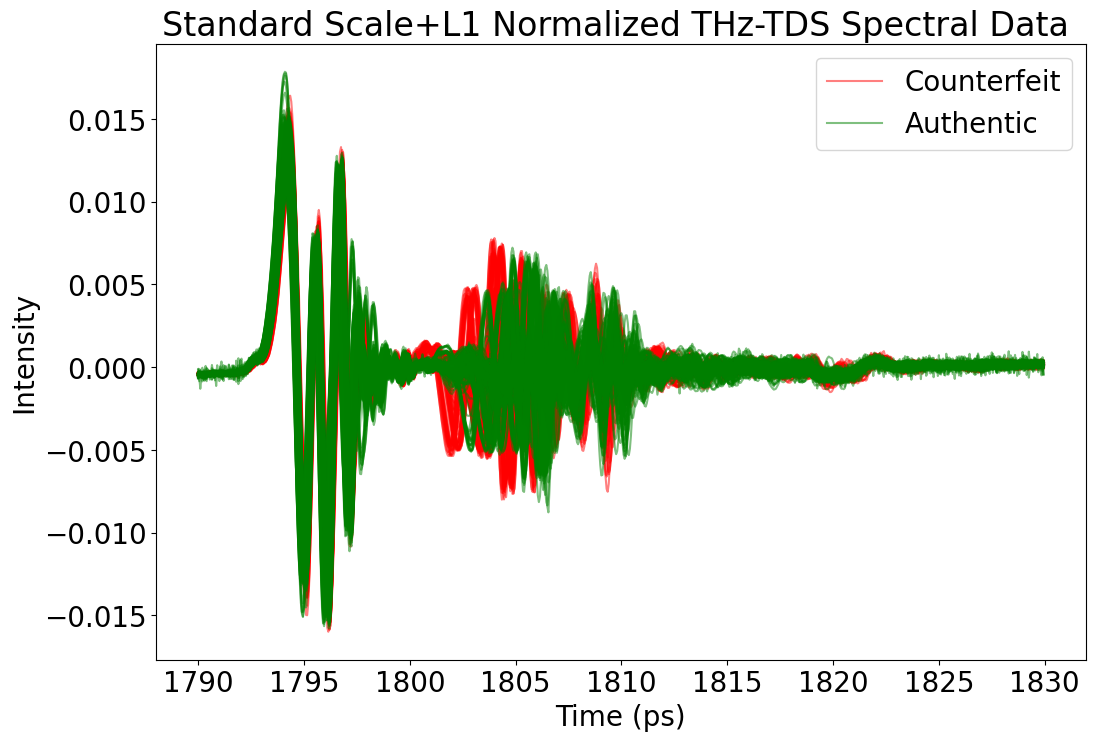

In [9]:
#%% Standard + L1
standard_l1_data = normalize(features_scaled_row_wise_df, norm='l1', axis=1)

# Updating the dataset with the normalized data
#data.update(pd.DataFrame(normalized_data, columns=feature_data.columns))
standard_l1_df = pd.DataFrame(standard_l1_data, columns=features.columns)

combined_standard_l1_data_df = pd.concat([labels_rest, standard_l1_df], axis=1)

plt.figure(figsize=(12, 8))

# Plotting spectra by category (Authentic and Counterfeit)
for index, row in combined_standard_l1_data_df.iterrows():
    if row['AC'] == 'Authentic':
        color = 'green'
        label = 'Authentic'
    elif row['AC'] == 'Counterfeit':
        color = 'red'
        label = 'Counterfeit'
    else:
        continue  # Skip rows that are neither Authentic nor Counterfeit
    plt.plot(time_axis, row[6:], color=color, alpha=0.5, label=label)

plt.title('Standard Scale+L1 Normalized THz-TDS Spectral Data ')
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')
# Adding a legend and ensuring each label is only added once
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())



## PCA

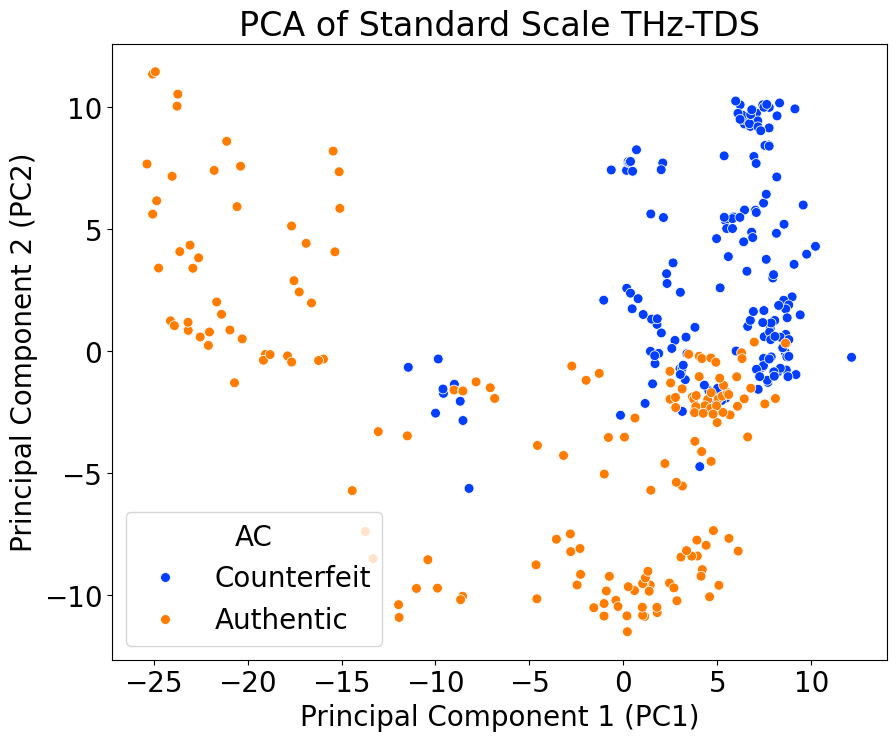

In [10]:
#%% PCA
pca = PCA(n_components=10)  # Example: reducing to 2 dimensions for visualization
pca_result = pca.fit_transform(features_scaled_row_wise_df)

# Converting the PCA result to a DataFrame for easier visualization
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(10)])

combined_pca_df = pd.concat([labels_rest, pca_df], axis=1)

plt.figure(figsize=(10, 8))
#sns.scatterplot(data=data, x='PC1', y='PC2', hue='label 4', style='label 3', palette='viridis')
sns.scatterplot(data=combined_pca_df, x='PC1', y='PC2', hue='AC',  palette='bright',s=50)

plt.title('PCA of Standard Scale THz-TDS')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.show()


C:\Users\patri\AppData\Local\Temp\ipykernel_31316\29745960.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'PC{i+1}' for i in range(10)], y=pca.explained_variance_ratio_, palette='viridis')


Text(0, 0.5, 'Variance Explained')

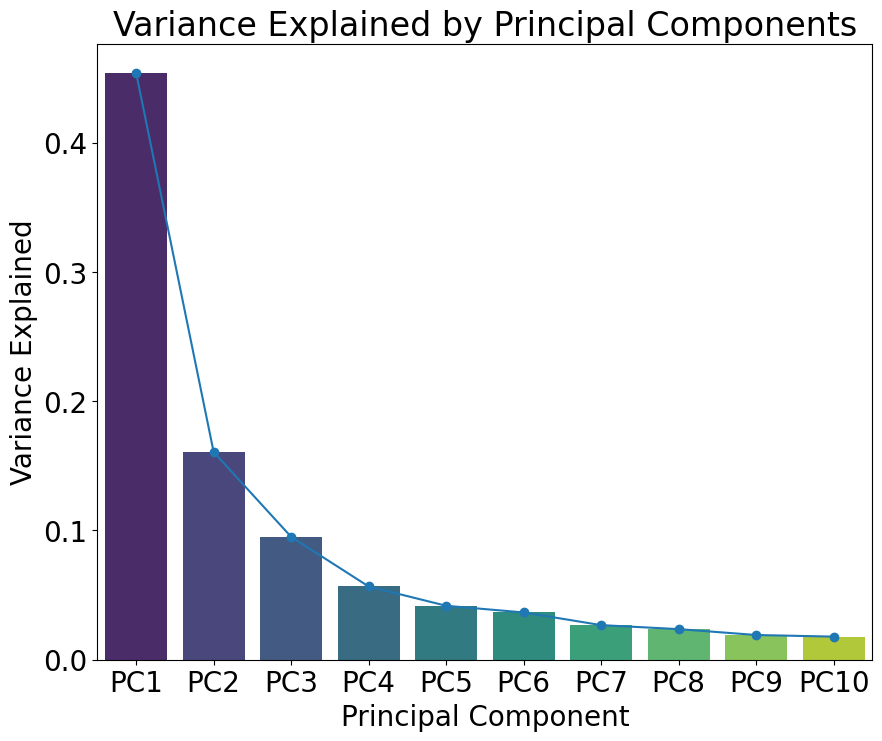

In [11]:
# Visualize principal components and their variance explained
plt.figure(figsize=(10, 8))
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.title('Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

# Bar plot of explained variance
sns.barplot(x=[f'PC{i+1}' for i in range(10)], y=pca.explained_variance_ratio_, palette='viridis')
plt.title('Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')


"\n# plot first sample spectrum in normalized data\nplt.plot(time_axis, features_scaled_row_wise_df.iloc[0, :], label='Sample Spectrum')\nplt.title('First Sample Spectrum')\nplt.xlabel('Time (ps)')\nplt.ylabel('Intensity')\nplt.legend()\n"

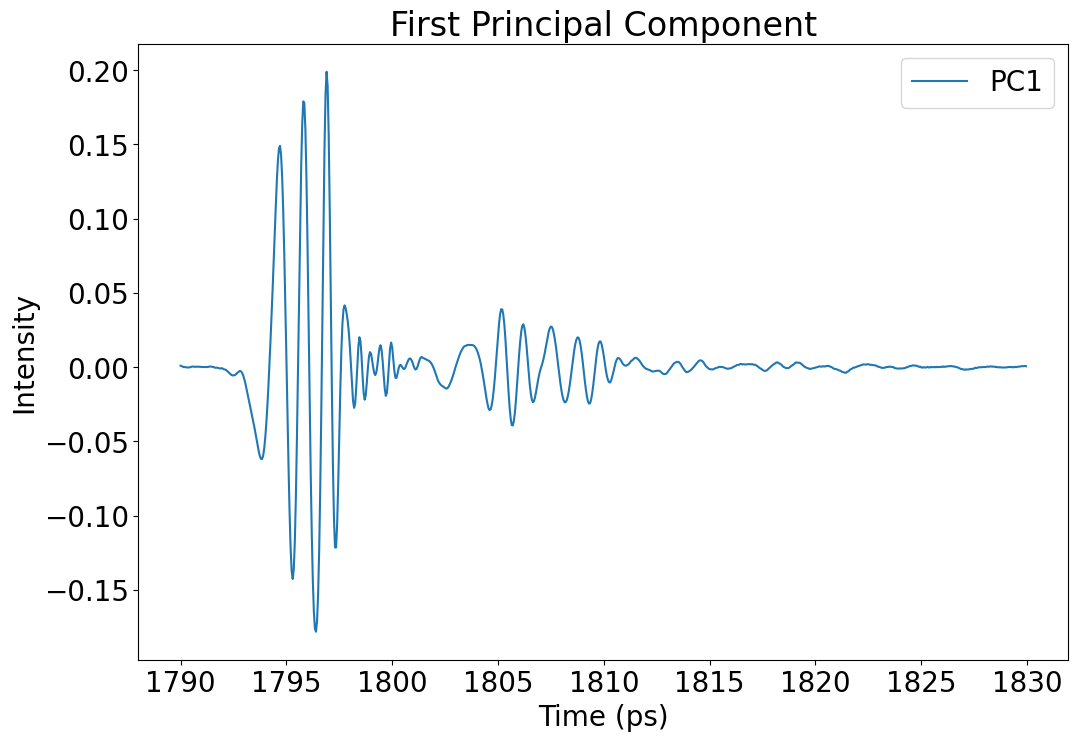

In [12]:
# Visualize the first princpal component
plt.figure(figsize=(12, 8))
# Plot the first principal component
plt.plot(time_axis, pca.components_[0], label='PC1')
plt.title('First Principal Component')
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')
plt.legend()

'''
# plot first sample spectrum in normalized data
plt.plot(time_axis, features_scaled_row_wise_df.iloc[0, :], label='Sample Spectrum')
plt.title('First Sample Spectrum')
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')
plt.legend()
'''


## Recursive Feature Elimation ( Easy Example )

In [13]:
combined_standard_l1_data_df.head()

# Fit RFE to determine most useful features
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into features and labels
features = combined_standard_l1_data_df.iloc[:, 6:]
labels = combined_standard_l1_data_df.iloc[:, :6]

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)

# Initialize the RFE object
rfe = RFE(estimator=rf, n_features_to_select=10)

# Fit the RFE object to the data
rfe.fit(features, labels['AC'])

# Get the ranking of each feature
feature_ranking = rfe.ranking_



C:\Users\patri\AppData\Local\Temp\ipykernel_31316\2062222735.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfe_features, y=feature_weights, palette='viridis', order=rfe_features.sort_values(ascending=False))


Text(0, 0.5, 'Weight')

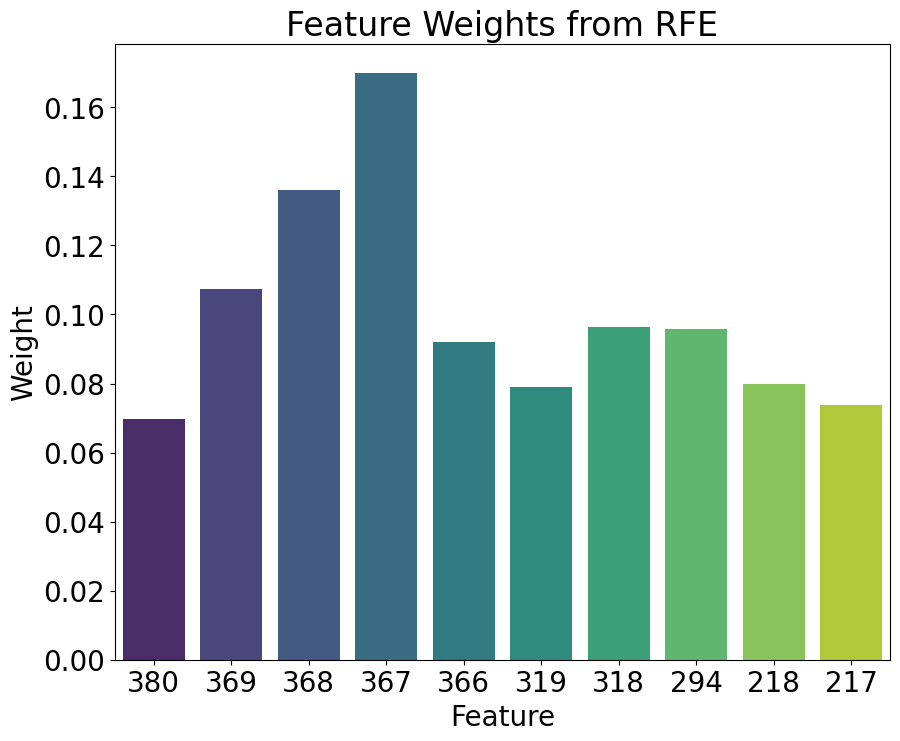

In [14]:
# Define RFE features
rfe_features = features.columns[rfe.support_]
feature_weights = rfe.estimator_.feature_importances_

# Plotting the feature weights
plt.figure(figsize=(10, 8))
sns.barplot(x=rfe_features, y=feature_weights, palette='viridis', order=rfe_features.sort_values(ascending=False))
plt.title('Feature Weights from RFE')
plt.xlabel('Feature')
plt.ylabel('Weight')

In [15]:
# Train a Random Forest Classifier using the selected features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels['AC'], test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = rf.predict(X_test)

# Get accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

rfe_features = features.columns[rfe.support_]


Accuracy: 0.99
              precision    recall  f1-score   support

   Authentic       0.97      1.00      0.98        32
 Counterfeit       1.00      0.97      0.99        37

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.99        69
weighted avg       0.99      0.99      0.99        69



### Visualization of "Most Important" Features for in determining THz.

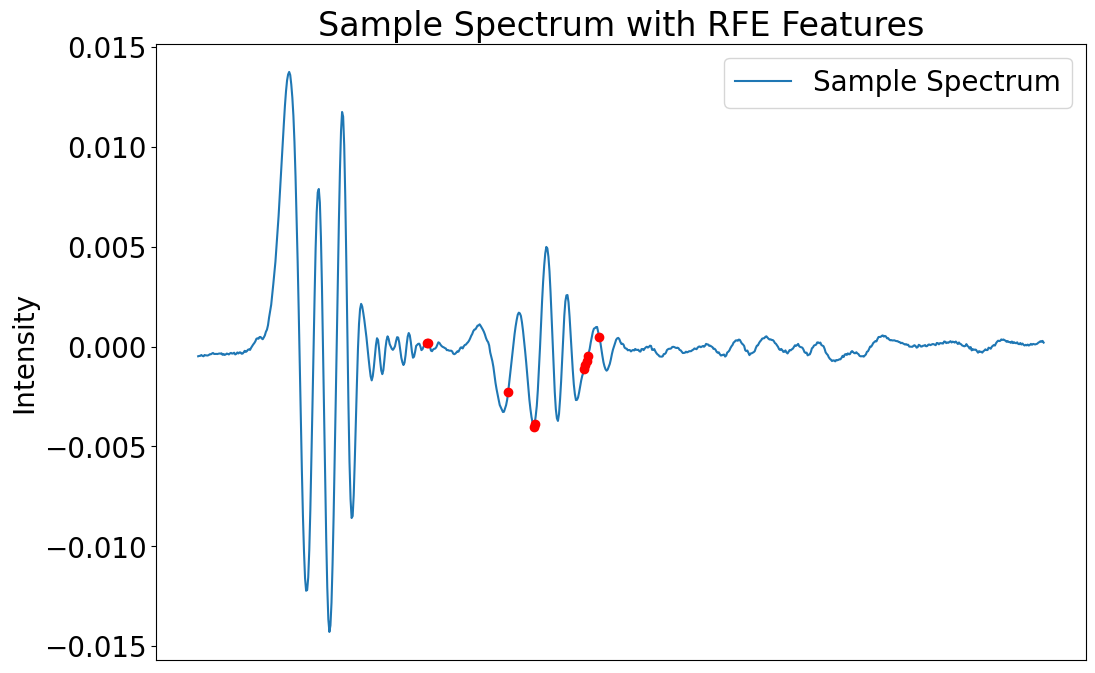

In [16]:
# Plot the original specvtrum of sample 1 across indice axis
plt.figure(figsize=(12, 8))
plt.plot(features.iloc[6, :], label='Sample Spectrum')

# Draw dots at critical features from RFE   
for feature in rfe_features:
    plt.plot(features.columns.get_loc(feature), features.iloc[6, features.columns.get_loc(feature)], 'ro')
    #plt.text(features.columns.get_loc(feature), features.iloc[6, features.columns.get_loc(feature)], features.columns.get_loc(feature), fontsize=10, ha='right', va='center')
    # add axis lines
    #plt.axvline(x=features.columns.get_loc(feature), color='black', linestyle='--', alpha=0.5)
    # add text for axis lines
    #plt.text(features.columns.get_loc(feature), 0, features.columns.get_loc(feature), fontsize=10, ha='right', va='top')
    
# Turn off x labels
plt.xticks([])
plt.title('Sample Spectrum with RFE Features')
plt.ylabel('Intensity')
plt.legend()

The above plot explains the most critical feature values for each. ```python Index(['63', '218', '294', '318', '319', '366', '367', '368', '369', '380']```

In [17]:
# print the features selected by RFE
print('Features selected by RFE:')
print(rfe_features)


Features selected by RFE:
Index(['217', '218', '294', '318', '319', '366', '367', '368', '369', '380'], dtype='object')


## Main Experiment

*Description*: The goal of this section of the experiment is to collect the indice values across the range of 0-N spectrum array values. These indice values will be stored for each experimental set(hyperparameters and model type), where they are used to formulate a distribution of indicies. This distribution will be used to infer which ranges on the THz spectrum are most releveant for "finger print" extractions. (Finding spectrum varianaces)

In [18]:
# Visualize the dataframe
combined_standard_l1_data_df.head()

,Sample,Scan,Location,AC,x,y,1,2,3,4,...,791,792,793,794,795,796,797,798,799,800
0,5,1,1,Counterfeit,10156,14661,-0.000417,-0.000431,-0.000465,-0.000430,...,0.000163,0.000139,0.000105,0.000260,0.000139,0.000093,0.000200,0.000148,0.000164,0.000129
1,5,1,2,Counterfeit,9921,36892,-0.000322,-0.000388,-0.000374,-0.000421,...,0.000205,0.000185,0.000352,0.000213,0.000336,0.000238,0.000294,0.000141,0.000279,0.000171
2,5,1,3,Counterfeit,6600,51552,-0.000400,-0.000429,-0.000418,-0.000480,...,0.000136,0.000178,0.000119,0.000140,0.000297,0.000273,0.000277,0.000253,0.000249,0.000297
3,5,1,4,Counterfeit,22233,14660,-0.000479,-0.000524,-0.000508,-0.000446,...,-0.000012,0.000029,0.000006,0.000099,0.000104,0.000091,0.000197,0.000055,0.000211,0.000177
4,5,1,5,Counterfeit,18572,33361,-0.000341,-0.000375,-0.000396,-0.000431,...,0.000350,0.000305,0.000275,0.000275,0.000314,0.000254,0.000201,0.000166,0.000230,0.000156


In [19]:
# Split dataset into features and labels
features = combined_standard_l1_data_df.iloc[:, 6:]
labels = combined_standard_l1_data_df.iloc[:, :6]

In [20]:
print("Features: \n", features.head(), '\n')

Features: 
           1         2         3         4         5         6         7  \
0 -0.000417 -0.000431 -0.000465 -0.000430 -0.000402 -0.000424 -0.000467   
1 -0.000322 -0.000388 -0.000374 -0.000421 -0.000416 -0.000366 -0.000320   
2 -0.000400 -0.000429 -0.000418 -0.000480 -0.000455 -0.000438 -0.000444   
3 -0.000479 -0.000524 -0.000508 -0.000446 -0.000457 -0.000438 -0.000428   
4 -0.000341 -0.000375 -0.000396 -0.000431 -0.000408 -0.000322 -0.000293   

          8         9        10  ...       791       792       793       794  \
0 -0.000441 -0.000431 -0.000406  ...  0.000163  0.000139  0.000105  0.000260   
1 -0.000382 -0.000353 -0.000290  ...  0.000205  0.000185  0.000352  0.000213   
2 -0.000429 -0.000402 -0.000343  ...  0.000136  0.000178  0.000119  0.000140   
3 -0.000469 -0.000429 -0.000398  ... -0.000012  0.000029  0.000006  0.000099   
4 -0.000379 -0.000396 -0.000302  ...  0.000350  0.000305  0.000275  0.000275   

        795       796       797       798       799     

In [21]:
print("Labels: \n",labels.head())

Labels: 
    Sample  Scan  Location           AC      x      y
0       5     1         1  Counterfeit  10156  14661
1       5     1         2  Counterfeit   9921  36892
2       5     1         3  Counterfeit   6600  51552
3       5     1         4  Counterfeit  22233  14660
4       5     1         5  Counterfeit  18572  33361


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels['Sample'], test_size=0.2, random_state=42)

X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,791,792,793,794,795,796,797,798,799,800
114,-0.000400,-0.000438,-0.000539,-0.000491,-0.000469,-0.000455,-0.000511,-0.000440,-0.000399,-0.000389,...,0.000030,0.000046,0.000113,0.000169,0.000111,0.000210,0.000180,0.000158,0.000245,0.000279
7,-0.000332,-0.000324,-0.000347,-0.000394,-0.000411,-0.000408,-0.000382,-0.000371,-0.000288,-0.000307,...,0.000284,0.000273,0.000237,0.000283,0.000217,0.000272,0.000220,0.000270,0.000245,0.000228
137,-0.000443,-0.000445,-0.000553,-0.000529,-0.000541,-0.000622,-0.000469,-0.000447,-0.000522,-0.000469,...,0.000145,0.000169,0.000137,0.000186,0.000104,0.000255,0.000210,0.000243,0.000251,0.000198
332,-0.000381,-0.000428,-0.000346,-0.000372,-0.000437,-0.000360,-0.000362,-0.000376,-0.000379,-0.000353,...,0.000182,0.000162,0.000178,0.000190,0.000154,0.000104,0.000217,0.000155,0.000234,0.000131
304,-0.000402,-0.000411,-0.000458,-0.000457,-0.000458,-0.000485,-0.000422,-0.000481,-0.000436,-0.000388,...,0.000083,0.000111,0.000214,0.000126,0.000193,0.000214,0.000223,0.000225,0.000197,0.000269


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


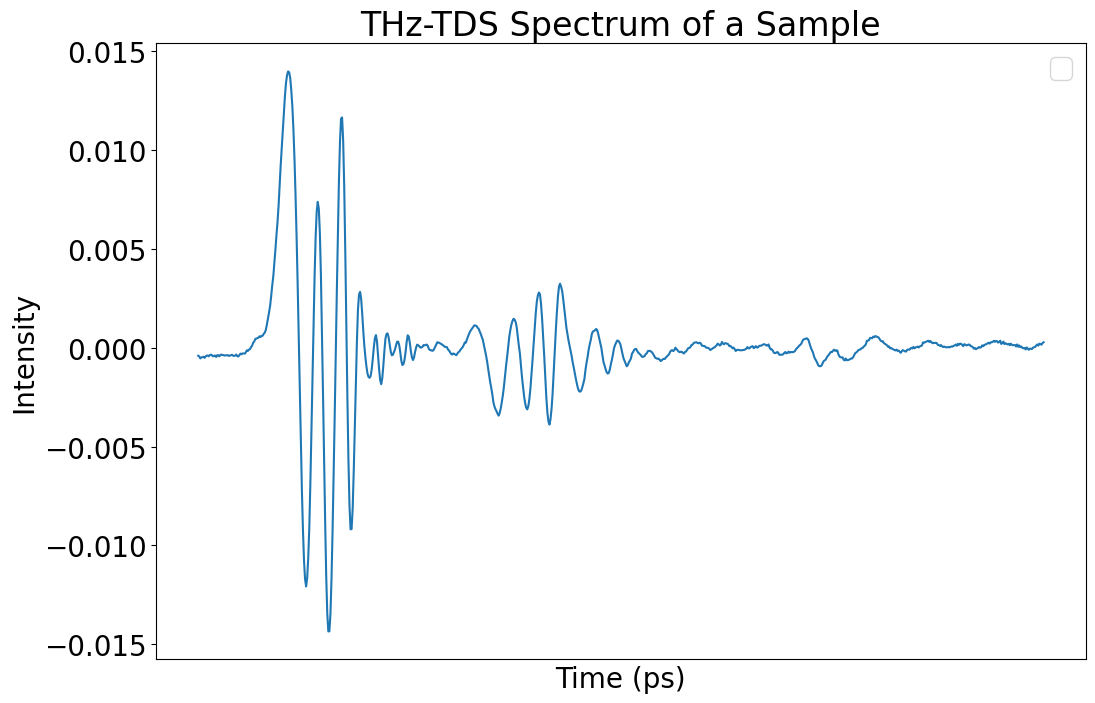

In [23]:
# Visualize a sample from X_train and X_test
plt.figure(figsize=(12, 8))
plt.plot(X_train.iloc[0, :])#, label='Training Sample')
#plt.plot(X_test.iloc[0, :], label='Testing Sample')
plt.title('THz-TDS Spectrum of a Sample')
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')
# turn off x labels
plt.xticks([])
plt.legend()


In [24]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = RandomForestClassifier()
cv = StratifiedKFold(5)

RFC_rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
RFC_rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {RFC_rfecv.n_features_}")



Optimal number of features: 246


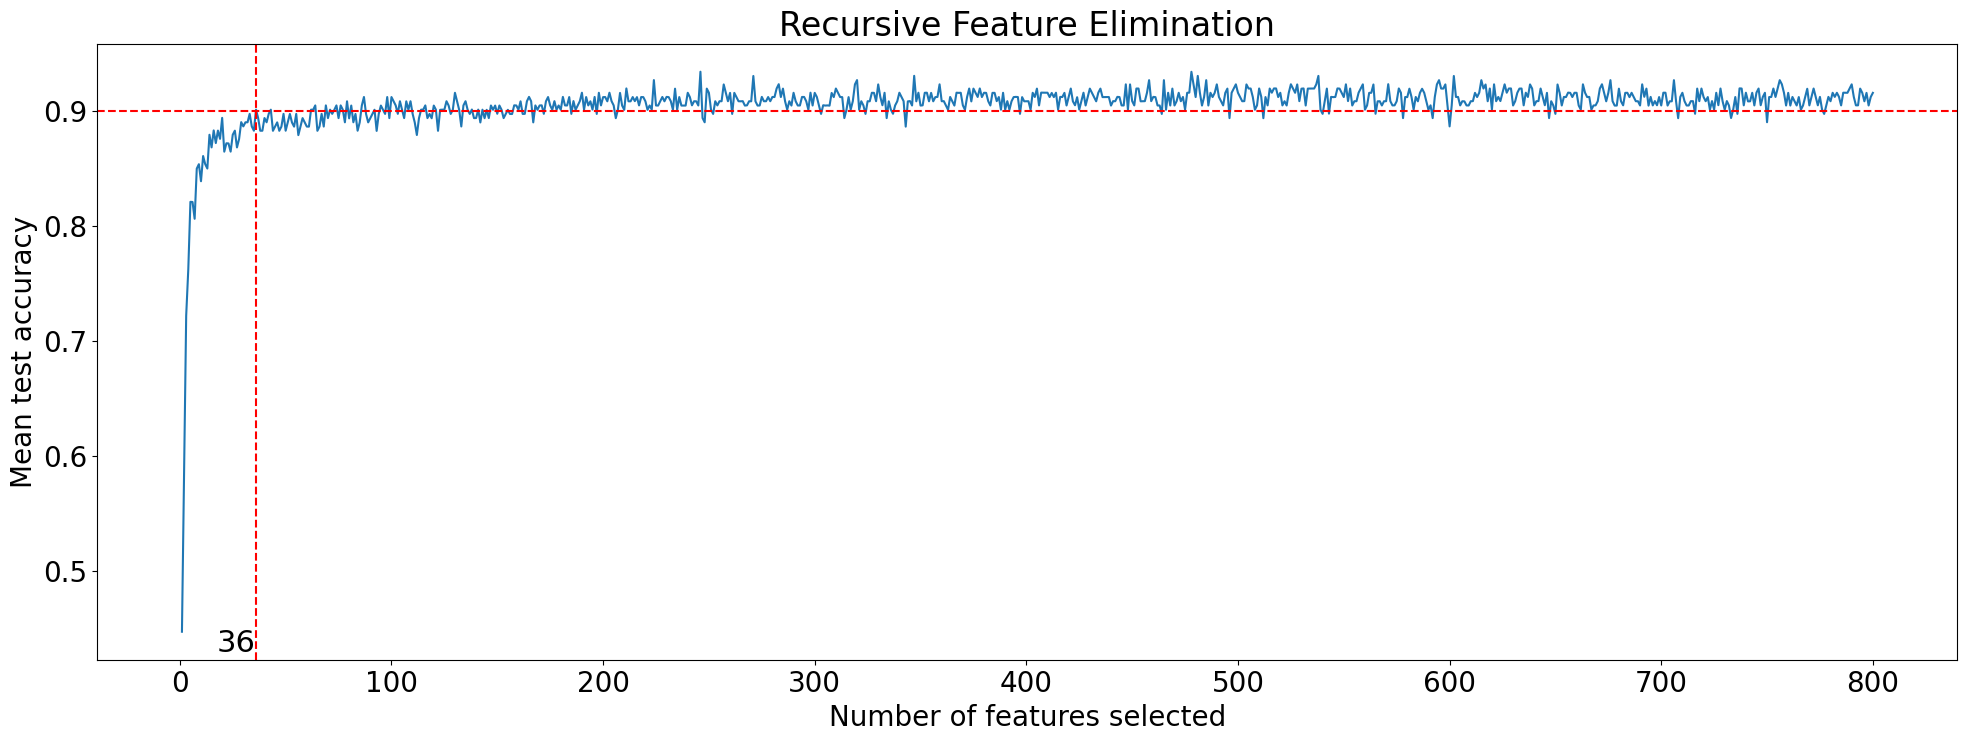

In [25]:
cv_results = pd.DataFrame(RFC_rfecv.cv_results_)
# Plot with only first 100 features
plt.figure(figsize=(24, 8))
plt.plot(cv_results["n_features"][:1000], cv_results["mean_test_score"][:1000])
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.title("Recursive Feature Elimination")
# draw horizontal line at accuracy limit
plt.axhline(y=0.90, color='r', linestyle='--')
# draw verticle line at first incidence of with 90% accuracy
plt.axvline(x=cv_results["n_features"][cv_results["mean_test_score"] > 0.90].iloc[0], color='r', linestyle='--')
# add text for axis lines
plt.text(cv_results["n_features"][cv_results["mean_test_score"] > 0.90].iloc[0], 0.45, cv_results["n_features"][cv_results["mean_test_score"] > 0.90].iloc[0], fontsize=22, ha='right', va='top')
plt.show()


c:\Users\patri\anaconda3\envs\pytorch\scikit-learn\Lib\site-packages\sklearn\feature_selection\_rfe.py:291: UserWarning: Found n_features_to_select=1000 > n_features=800. There will be no feature selection and all features will be kept.
  warnings.warn(
C:\Users\patri\AppData\Local\Temp\ipykernel_31316\240870231.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfe_features, y=feature_weights, palette='viridis', order=rfe_features.sort_values(ascending=True))


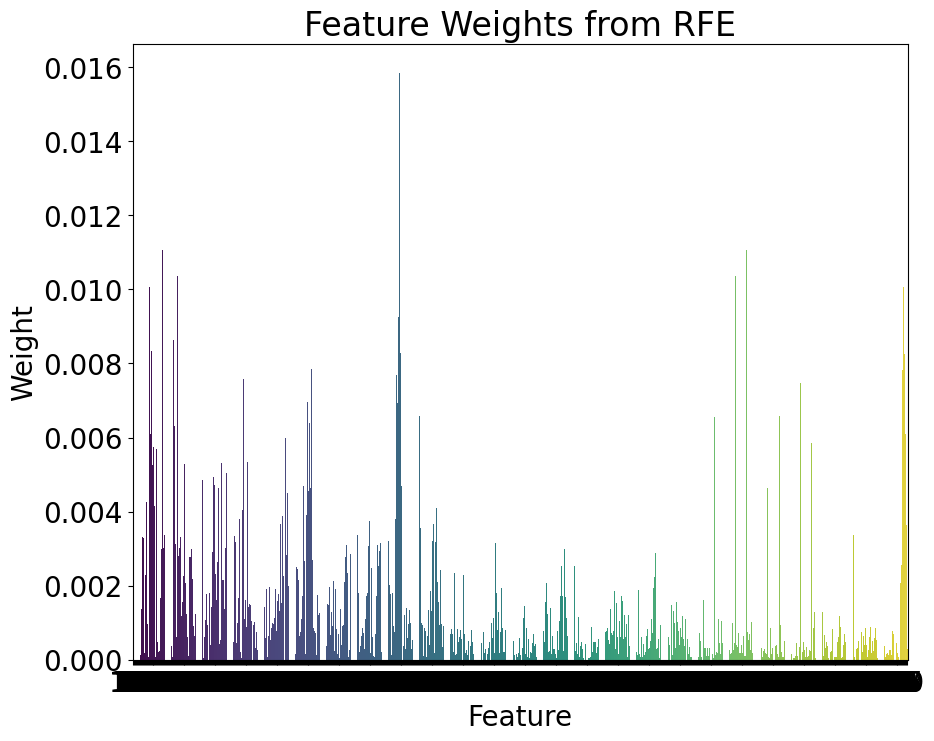

In [26]:
# Train RFE with 10 features
rfe = RFE(estimator=clf, n_features_to_select=1000)
rfe.fit(X_train, y_train)

# Get the ranking of each feature
feature_ranking = rfe.ranking_

# Define RFE features
rfe_features = X_train.columns[rfe.support_]
feature_weights = rfe.estimator_.feature_importances_

# Plotting the feature weights
plt.figure(figsize=(10, 8))
sns.barplot(x=rfe_features, y=feature_weights, palette='viridis', order=rfe_features.sort_values(ascending=True))
plt.title('Feature Weights from RFE')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.xticks=[]



In [27]:
# Get max value in rfe_features
max_value = rfe_features.max()
print(max_value)
min_value = rfe_features.min()
print(min_value)



99
1


In [28]:
print(rfe_features.sort_values(ascending=True))

Index(['1', '10', '100', '101', '102', '103', '104', '105', '106', '107',
       ...
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'],
      dtype='object', length=800)


C:\Users\patri\AppData\Local\Temp\ipykernel_31316\219590780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rfe_features, y=feature_weights, palette='viridis', order=rfe_features.sort_values(ascending=True))


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, ''),
 Text(50, 0, ''),
 Text(51, 0, ''),
 Text(52, 0, ''),
 Text(53, 0, ''),
 Text(54, 0, ''),
 Text(55, 0, ''),
 T

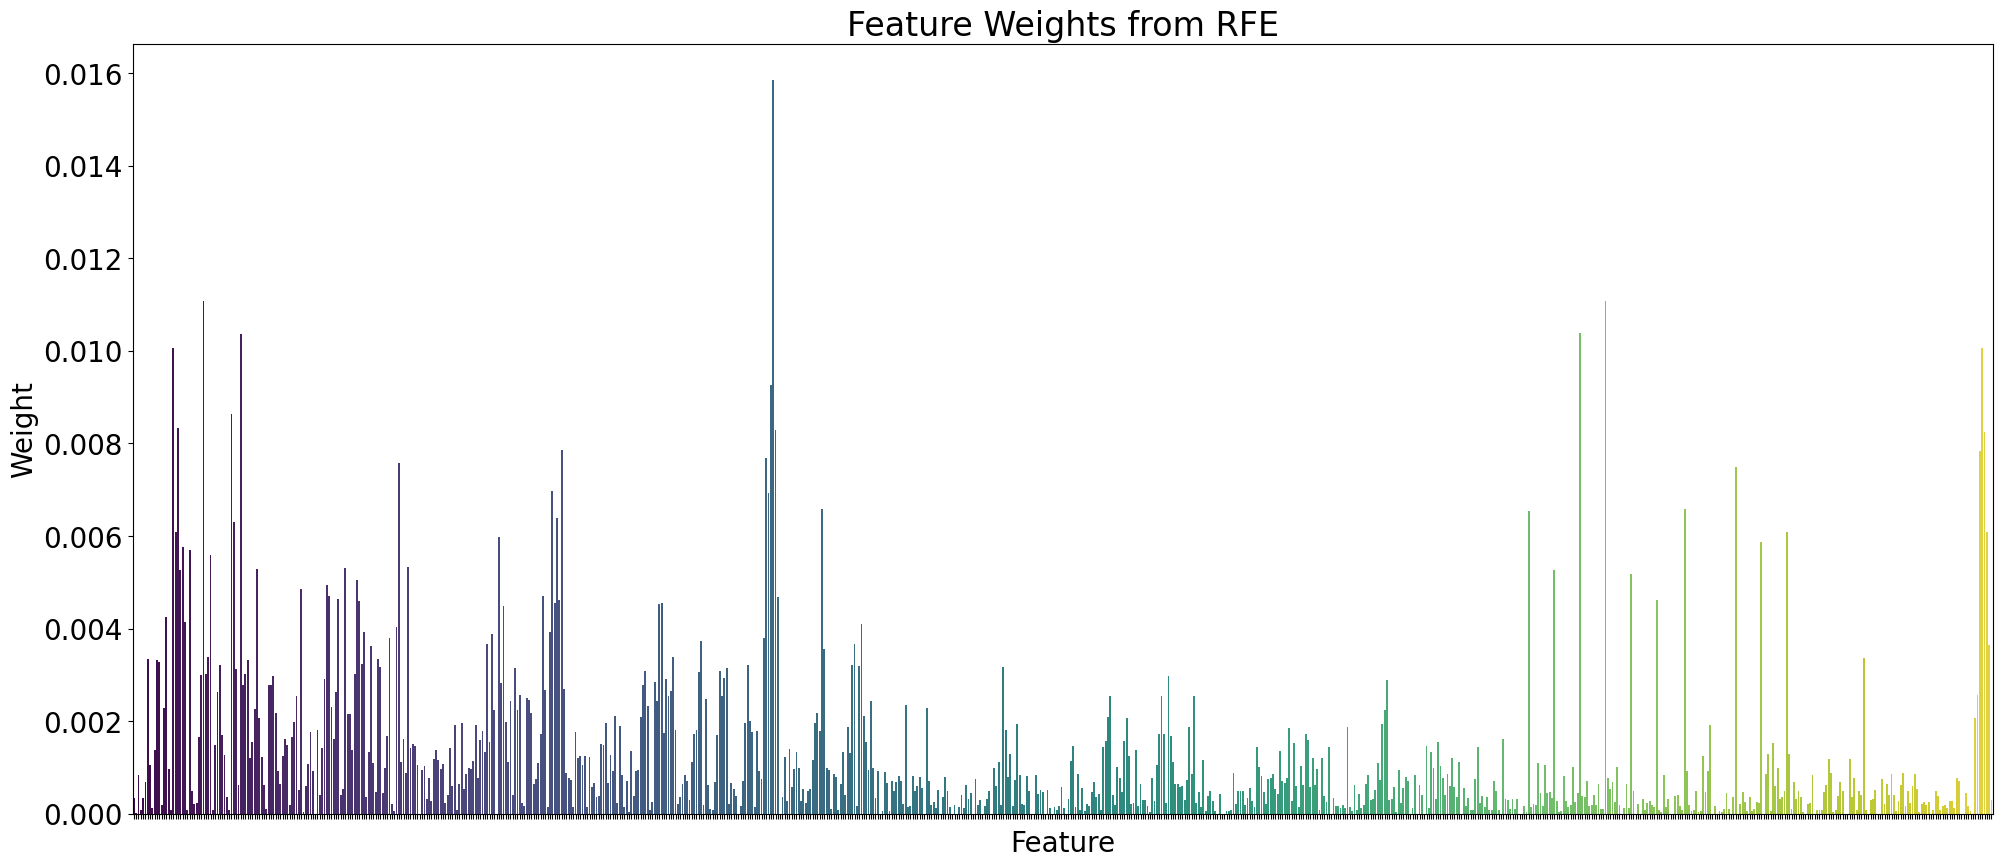

In [29]:

# Plotting the feature weights
plt.figure(figsize=(24, 10))
sns.barplot(x=rfe_features, y=feature_weights, palette='viridis', order=rfe_features.sort_values(ascending=True))
plt.title('Feature Weights from RFE')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.gca().set_xticklabels([], rotation=90)

In [30]:
# print most important features with weights > 0.006
print('Features selected by RFE:')
print(rfe_features[feature_weights > 0.006])


Features selected by RFE:
Index(['64', '66', '67', '70', '72', '74', '94', '95', '96', '97', '114',
       '115', '116', '126', '137', '138', '140', '201', '261', '263', '265',
       '344', '345', '346', '347', '348', '366'],
      dtype='object')


In [31]:
# Get model accuracy
accuracy = RFC_rfecv.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
y_pred = RFC_rfecv.predict(X_test)
print(classification_report(y_test, y_pred))



Accuracy: 0.88
              precision    recall  f1-score   support

           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00         6
           3       0.83      1.00      0.91        10
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         8
           6       1.00      0.64      0.78        11
           7       0.83      0.83      0.83        12
           8       0.75      1.00      0.86         6

    accuracy                           0.88        69
   macro avg       0.90      0.91      0.89        69
weighted avg       0.90      0.88      0.88        69



In [32]:
print(rfe_features)

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '791', '792', '793', '794', '795', '796', '797', '798', '799', '800'],
      dtype='object', length=800)


In [33]:
# Find the top 10 features
top_features = feature_weights.argsort()[-10:][::-1]
top_feature_names = X_train.columns[top_features]

# print the top 10 features
print('Top 10 features:')
print(top_feature_names)


Top 10 features:
Index(['347', '126', '67', '66', '140', '114', '95', '346', '137', '116'], dtype='object')


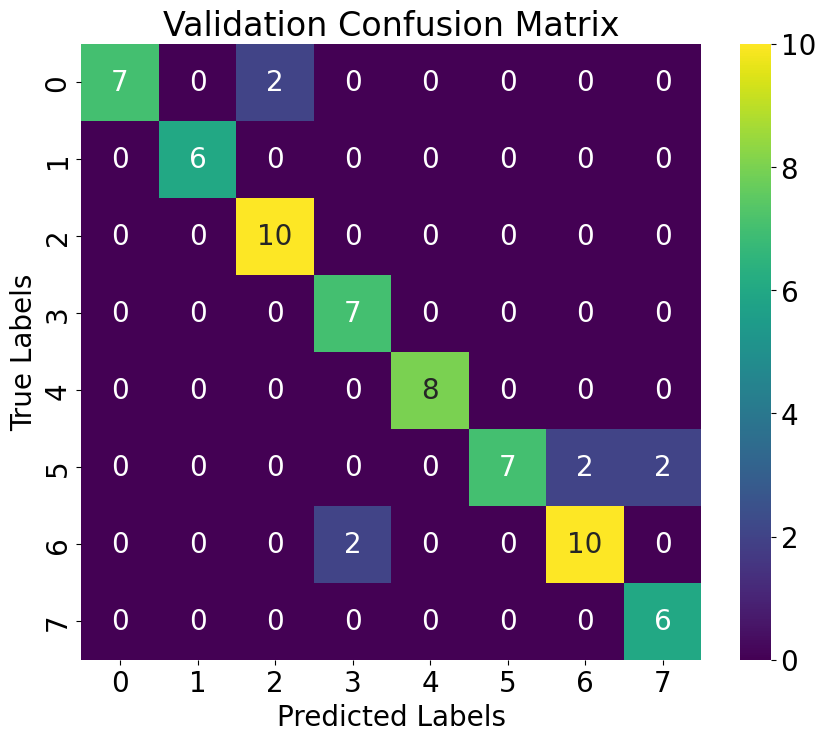

In [36]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



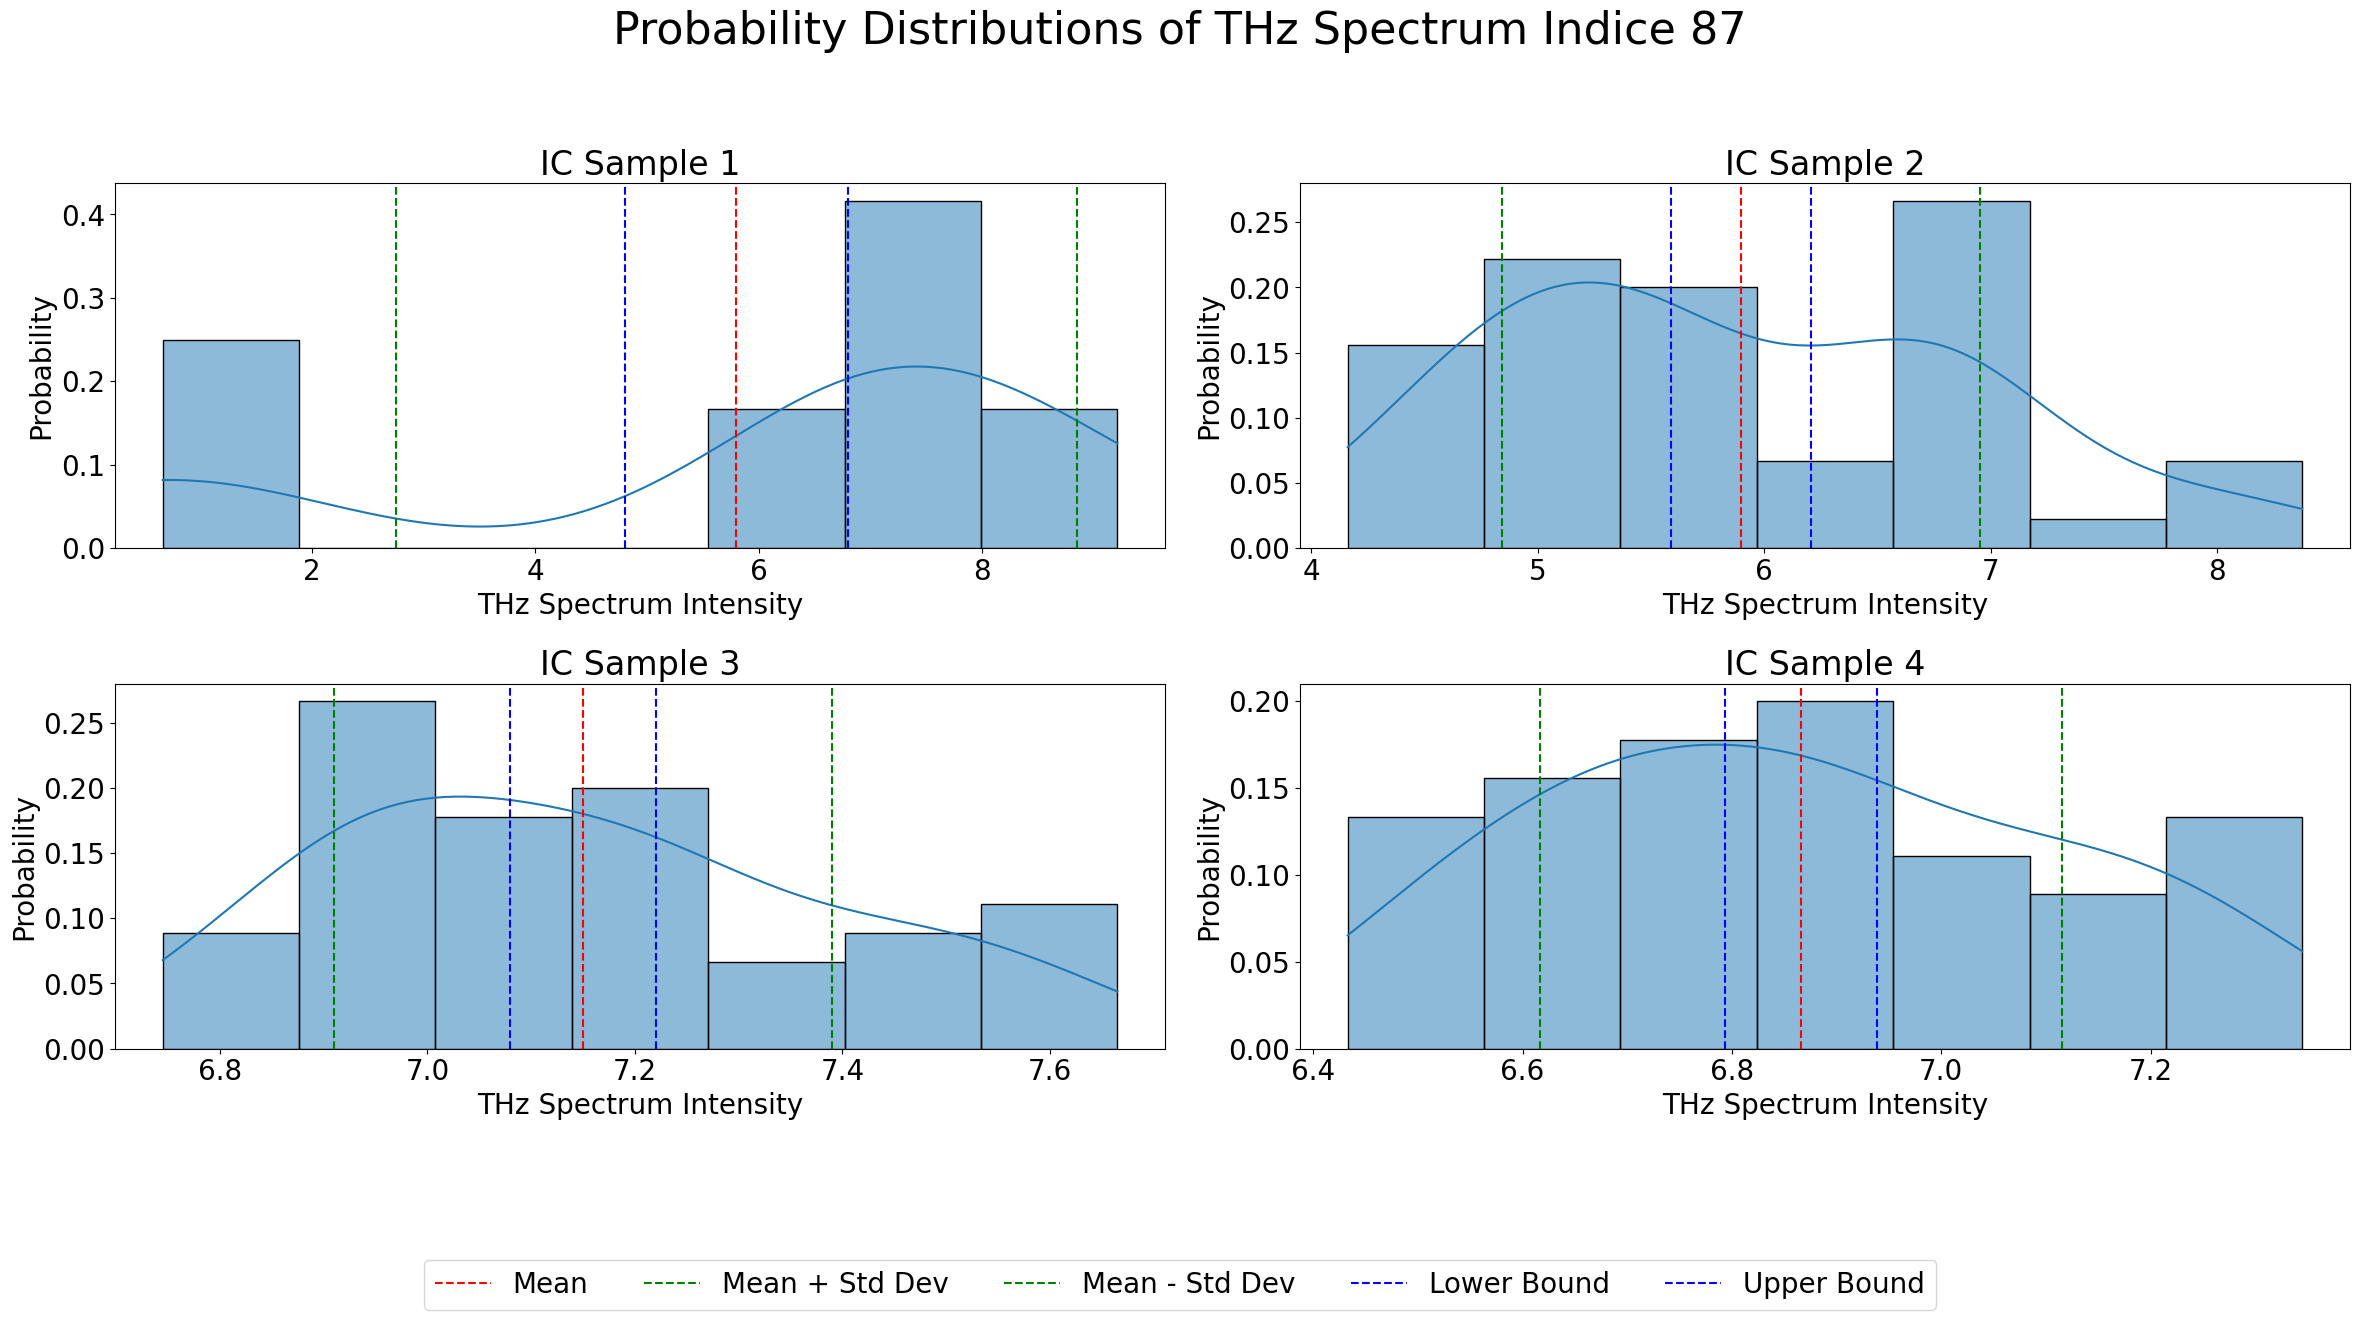

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_subplots(dataframe, sample_indices, z=1.96):
    n_samples = len(sample_indices)
    fig, axes = plt.subplots(2, 2, figsize=(24, 12))
    axes = axes.flatten()  # Flatten the 2x2 array of axes for easy iteration

    # Store legend handles and labels for a single legend
    handles = []
    labels = []

    for idx, sample_idx in enumerate(sample_indices):
        sample_df = dataframe[dataframe['Sample'] == sample_idx]
        mean_87 = sample_df["87"].mean()
        std_87 = sample_df["87"].std()
        n = len(sample_df)
        
        lower_bound = mean_87 - (z * (std_87 / np.sqrt(n)))
        upper_bound = mean_87 + (z * (std_87 / np.sqrt(n)))

        sns.histplot(sample_df["87"], kde=True, stat='probability', ax=axes[idx])
        axes[idx].axvline(mean_87, color='red', linestyle='--', label='Mean')
        axes[idx].axvline(mean_87 + std_87, color='green', linestyle='--', label='Mean + Std Dev')
        axes[idx].axvline(mean_87 - std_87, color='green', linestyle='--', label='Mean - Std Dev')
        axes[idx].axvline(lower_bound, color='blue', linestyle='--', label='Lower Bound')
        axes[idx].axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound')
        
        axes[idx].set_title(f'IC Sample {sample_idx}')
        axes[idx].set_xlabel('THz Spectrum Intensity')
        axes[idx].set_ylabel('Probability')

        # Collect handles and labels for the legend only once
        if idx == 0:
            handles, labels = axes[idx].get_legend_handles_labels()

    # Remove any empty subplots if sample_indices < 4
    if n_samples < 4:
        for j in range(n_samples, 4):
            fig.delaxes(axes[j])

    # Add a single legend outside the subplots, ensuring it's in one line
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))

    # Add a super title for the entire figure
    fig.suptitle('Probability Distributions of THz Spectrum Indice 87', fontsize=32)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()

# List of sample indices to plot
sample_indices = [1, 2, 3, 4]

# Generate 2x2 subplots
plot_subplots(df, sample_indices)


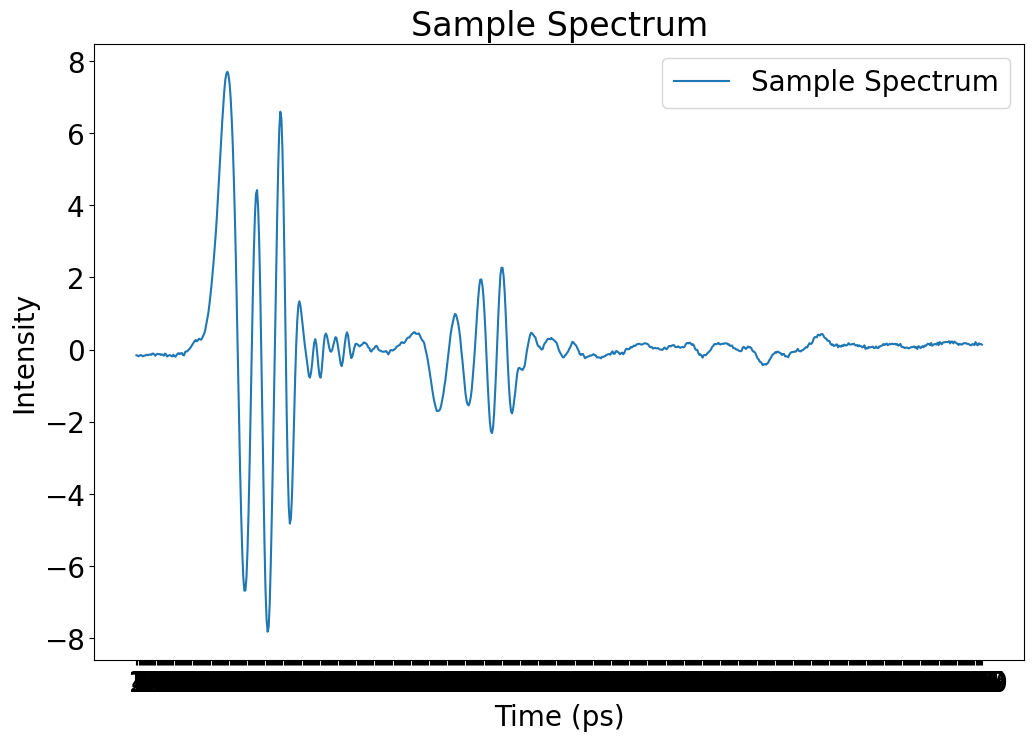

In [39]:
# Plot spectrum of 1 location
plt.figure(figsize=(12, 8))
plt.plot(df.iloc[0, 6:], label='Sample Spectrum')
plt.title('Sample Spectrum')
plt.xlabel('Time (ps)')
plt.ylabel('Intensity')
plt.legend()
plt.xticks=[]
